<a href="https://colab.research.google.com/github/zhong338/MFM-courses-/blob/main/Week9_WhiteNoie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222

## Time Series and White Noise



Recall that a weakly stationary series $\{X_i\}$ be characterized via:

1. $\mathrm{E}(X_i) = \mu, \forall i$

2. $\mathrm{Var}(X_i) = \sigma^2 \forall i$

3. $\mathrm{Cov}(X_i,X_j) = \sigma^2 \rho(|i-j|)$, for some function $\rho(h)$

and that $\rho$ is called the Auto Correlation Function (ACF)



A special class of times serie are called *White Noise*.  We say a time serie is (weak) White Noise if

1. It is (weakly) stationary

and 

2. The ACF satisfies  $\rho(h) = 0, h \geq 1$



This just means that each value of $X_i$ is a random draw with outcome uncorrelated to any previous draws. 

If the distribution for each of the  $X_i$'s is Normal (or Gaussian), we say the series is Gaussian White Noise.


In this video, we will look at a few time series and observe whether they appear to be White Noise. We will then describe the Lejung-Box test and apply to the series we have oberved.





In [18]:
pip install statsmodels==0.13.2

In [19]:
import statsmodels

statsmodels.__version__

'0.13.2'

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import pandas_datareader.data as dr




## Getting some data series

We use FRED to get M2, unemployment rates, CPI, and Real GDP.    We take 10 years of data and take the window in beween the GFC and COVID (so that we have a chance as stationarity).

In [21]:
edata = CPI = dr.DataReader(['WM2NS','UNRATE','CPIAUCSL','GDPC1'], 'fred', "2010-01-01", "2019-12-31")

edata.head()

,WM2NS,UNRATE,CPIAUCSL,GDPC1
DATE,,,,
2010-01-01,NaN,9.8,217.488,15456.059
2010-01-04,8531.2,NaN,NaN,NaN
2010-01-11,8492.2,NaN,NaN,NaN
2010-01-18,8473.6,NaN,NaN,NaN
2010-01-25,8408.5,NaN,NaN,NaN


### M2

A we saw before, M2 has trend.  Differencing M2 will still lead us to a series that, while stationary, does not appear to be White Noise.

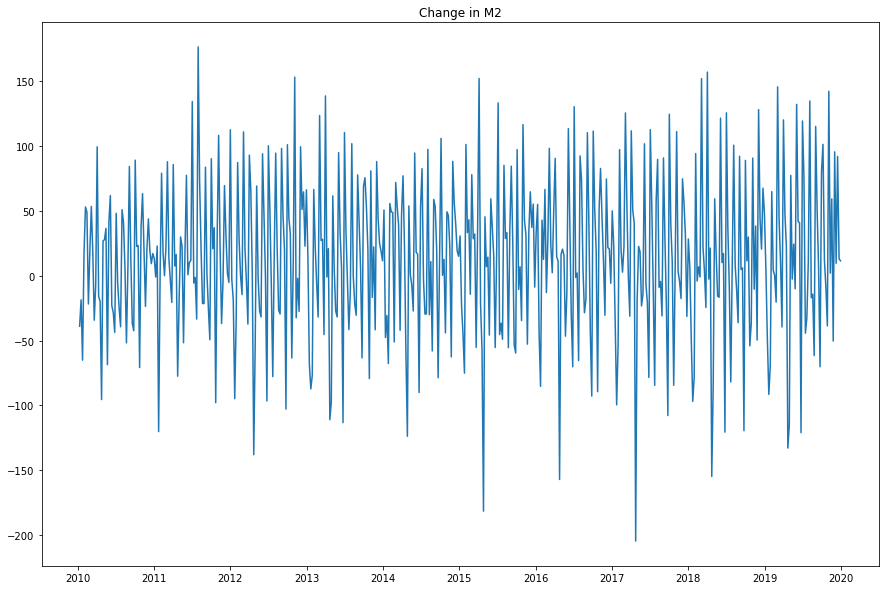

In [22]:
m2 = (edata.WM2NS).dropna()

m2change = m2.diff().dropna()


plt.figure(figsize= (15,10))

plt.plot(m2change)

plt.title("Change in M2")


plt.show()



We then look at the autocorrelation

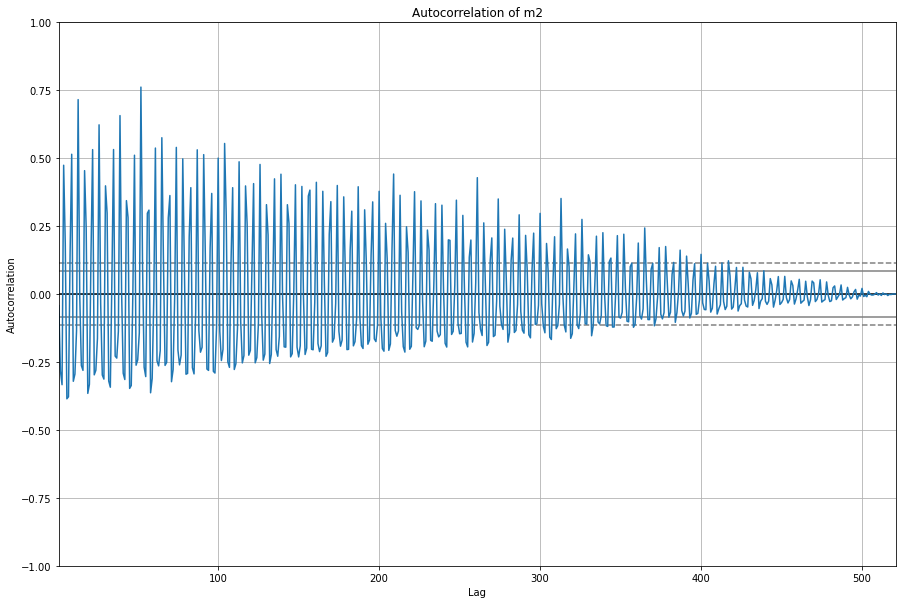

In [23]:
plt.figure(figsize = (15,10))

x = pd.plotting.autocorrelation_plot(m2change)
 
# plotting the Curve
x.plot()

plt.title("Autocorrelation of m2")
 
# Display
plt.show()

This does not appear to be white noise.  We will statistically test this later.

### Unemployment

We again focus on the change in unemployment rate which appears to be stationary.

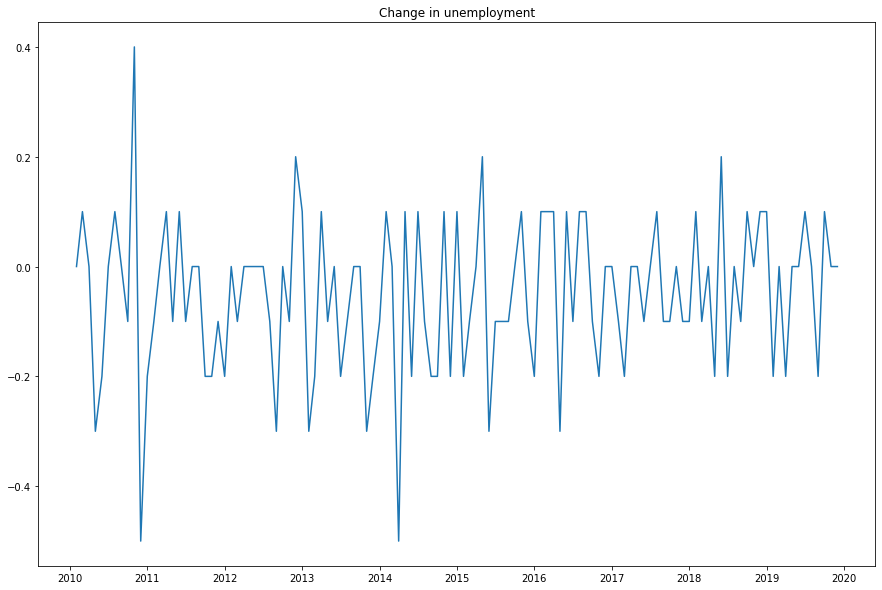

In [24]:
unemp = (edata.UNRATE).dropna()

unempchange = unemp.diff().dropna()


plt.figure(figsize= (15,10))

plt.plot(unempchange)

plt.title("Change in unemployment")


plt.show()

Text(0.5, 1.0, 'Autocorrelation of change in unemployment')

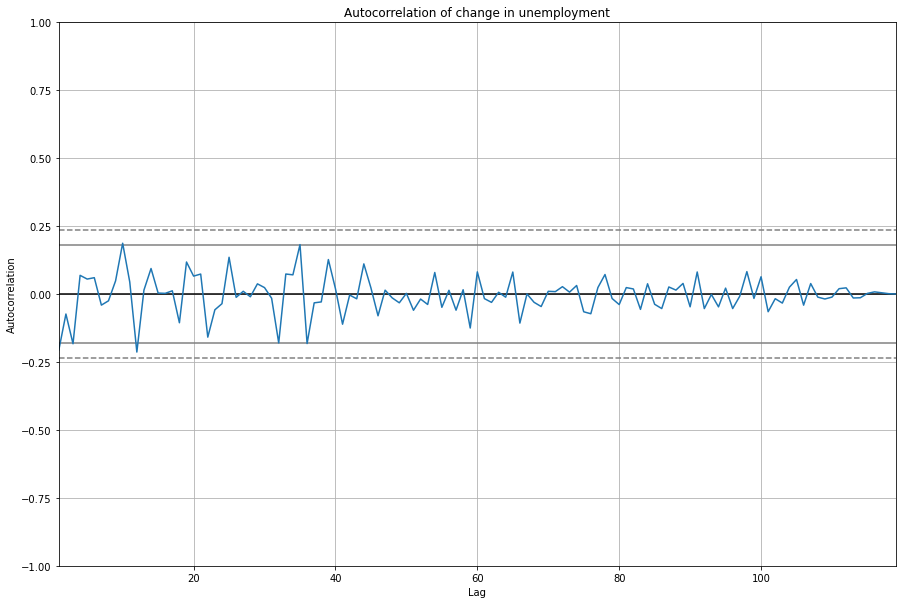

In [25]:
plt.figure(figsize = (15,10))

x = pd.plotting.autocorrelation_plot(unempchange)
 
# plotting the Curve
x.plot()

plt.title("Autocorrelation of change in unemployment")
 
# Display

Noting that every correlation is inside the 95% CI (the bands), we surmise that this might be white noise.

### Inflation

Before working with inflation, we will use the CPI data to creat a time-series of monthly inflation rates.

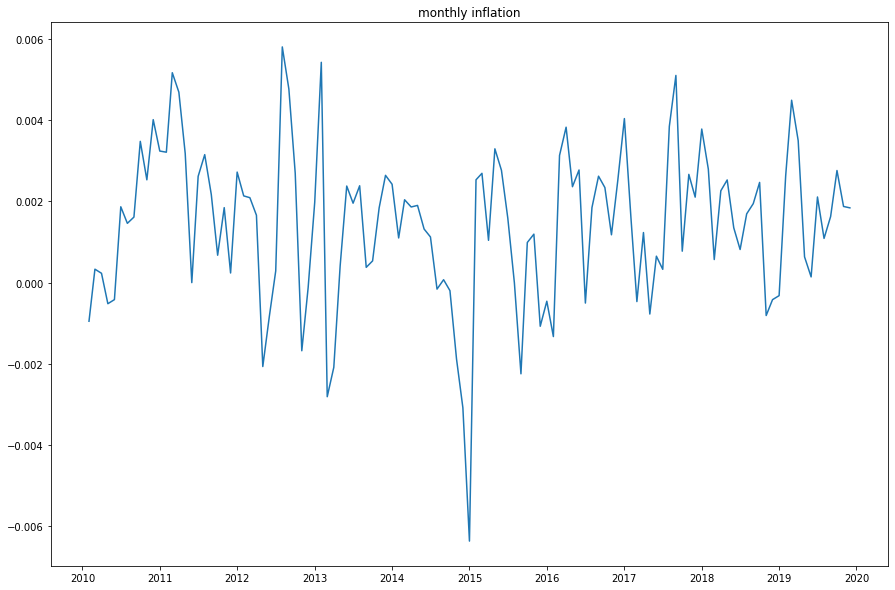

Text(0.5, 1.0, 'Autocorrelation of monthly inflation')

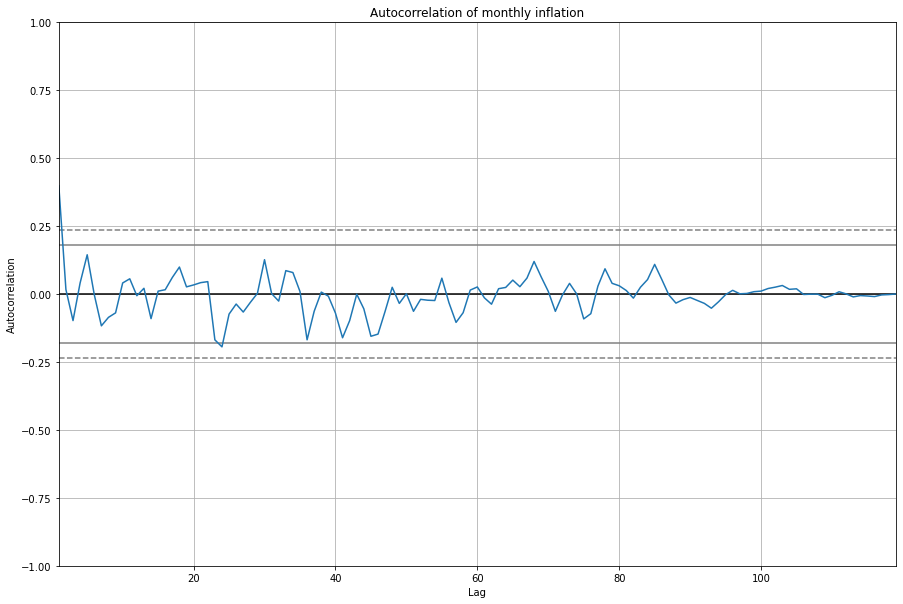

In [26]:
cpi = edata.CPIAUCSL.dropna()



ifl_monthly= (cpi.diff()/cpi.shift(1)).dropna()

plt.figure(figsize= (15,10))

plt.plot(ifl_monthly)

plt.title("monthly inflation")


plt.show()



plt.figure(figsize = (15,10))

x = pd.plotting.autocorrelation_plot(ifl_monthly)
 
# plotting the Curve
x.plot()

plt.title("Autocorrelation of monthly inflation")
 
# Display






From the first plot, stationarity is unclear.   From the second, White Noise is plausible (assuming stationarity). 

Let's go ahead and difference the series and see what that looks like.

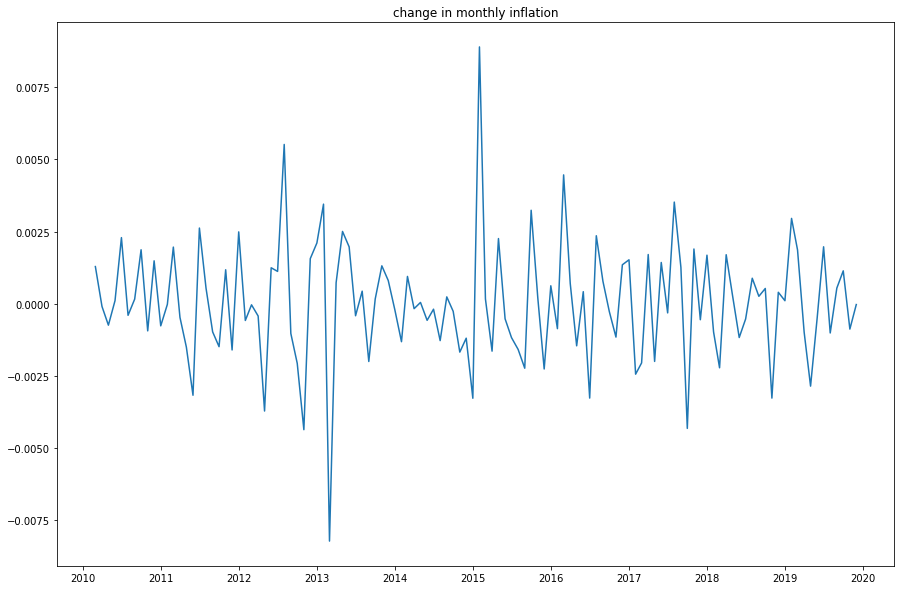

Text(0.5, 1.0, 'Autocorrelation of change in monthly inflation')

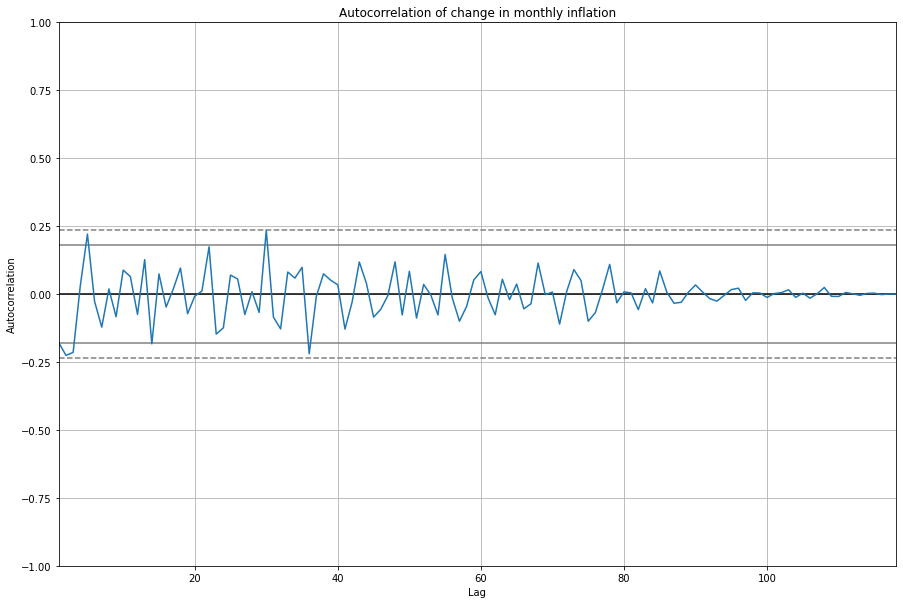

In [27]:

plt.figure(figsize= (15,10))

plt.plot(ifl_monthly.diff())

plt.title("change in monthly inflation")


plt.show()



plt.figure(figsize = (15,10))

x = pd.plotting.autocorrelation_plot(ifl_monthly.diff().dropna())
 
# plotting the Curve
x.plot()

plt.title("Autocorrelation of change in monthly inflation")
 
# Display

We may wish to apply a statistical test here.

### Real GDP growth

We will calculate the quarterly GDP growth and make the appropriate plots.

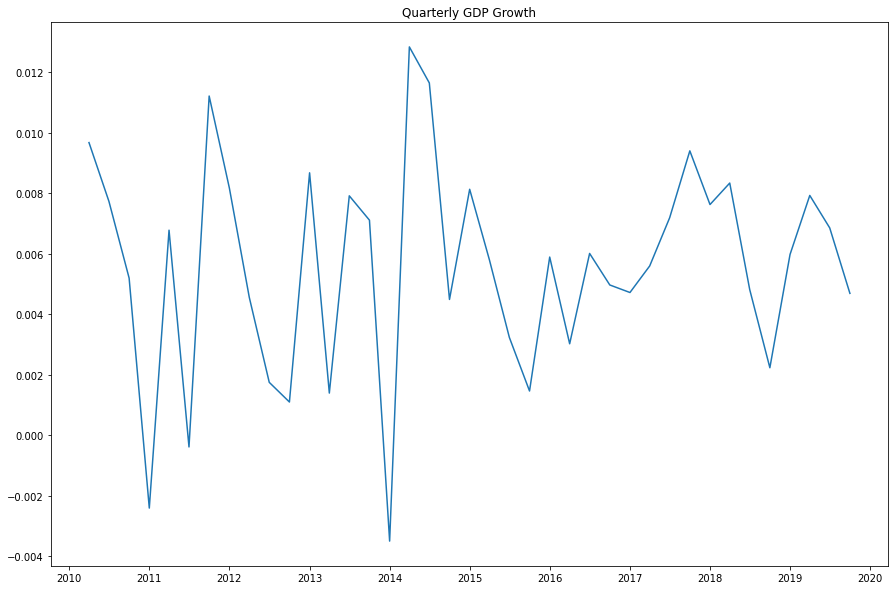

Text(0.5, 1.0, 'Autocorrelation of GDP growth')

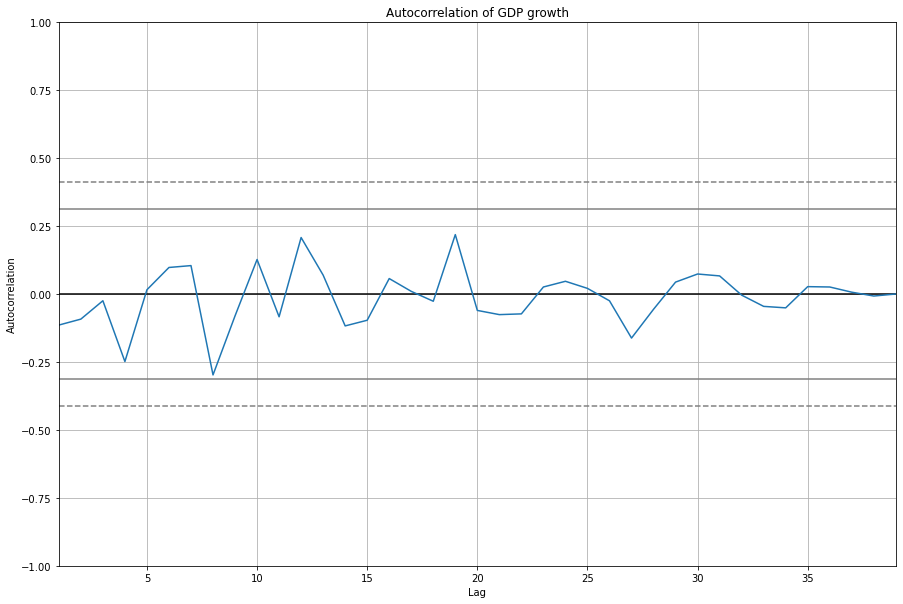

In [28]:
gdp = edata.GDPC1.dropna()

gdpGrowth = (gdp.diff()/gdp.shift()).dropna()

plt.figure(figsize= (15,10))

plt.plot(gdpGrowth)

plt.title("Quarterly GDP Growth")


plt.show()



plt.figure(figsize = (15,10))

x = pd.plotting.autocorrelation_plot(gdpGrowth)
 
# plotting the Curve
x.plot()

plt.title("Autocorrelation of GDP growth")
 
# Display




This does kind of look like white noise.  We await a statistical test.

## Ljung-Box Test

The Ljung-Box test test the null hypothesis that $\rho(h) = 0$ for $1 \geq h \geq lg$ against the alternative that  $\rho(h) \neq 0$ for some value of $h, 1 \geq h \geq lg$


The test itself is given by:

$$LBstat = T(T+2)\sum_{h=1}^{lg} \frac{\hat{\rho}(h)^2}{T-h}$$

where $T$ is the sample size and $\hat{\rho}(h)$ is the sample ACF.

Asymptotically, the test statistics is $\sim \chi^2_{lg}$

What value of $lg$ is appropriate?  Generally, you want it to be large enough to test the relevenant lags. In most software, a defualt value is calculated if you don't give it one.


In python, we can calculate the Ljung_Box stat and p-value using the function acorr_ljungbox from the module statsmodels.stats.diagnostic

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lbox

Let's apply this to our examples above.

In [30]:
lbox(m2change)

,lb_stat,lb_pvalue
1,0.978775,3.225014e-01
2,43.097699,4.379792e-10
3,101.680228,6.763746e-22
4,219.971048,1.901779e-46
5,238.158895,1.905597e-49
6,316.802896,2.046901e-65
7,392.596197,9.227224e-81
8,404.592824,1.950087e-82
9,545.273595,1.147718e-111
10,600.269090,1.541996e-122


As expected

In [31]:
lbox(unempchange)

,lb_stat,lb_pvalue
1,5.182600,0.022814
2,5.850725,0.053645
3,10.012752,0.018458
4,10.602406,0.031415
5,10.983419,0.051710
6,11.442860,0.075616
7,11.657904,0.112385
8,11.739493,0.163211
9,12.044670,0.210803
10,16.653542,0.082390


This is conistent with the hypthosesis of White Noise that we suggested above.

In [32]:
lbox(ifl_monthly)

,lb_stat,lb_pvalue
1,19.309991,0.000011
2,19.342753,0.000063
3,20.530769,0.000132
4,20.736202,0.000357
5,23.368100,0.000287
6,23.368984,0.000682
7,25.131647,0.000719
8,26.089879,0.001014
9,26.719884,0.001556
10,26.937406,0.002664


This suggests the montly inflation rate is not white noise.

In [33]:
lbox(ifl_monthly.diff().dropna())

,lb_stat,lb_pvalue
1,3.900257,0.048279
2,10.124201,0.006332
3,15.803813,0.001244
4,15.913937,0.003137
5,22.006231,0.000522
6,22.102891,0.001160
7,23.999047,0.001140
8,24.044065,0.002253
9,24.954020,0.003022
10,25.964844,0.003788


This also suggests that monthly changes in inflation is not just White Noise (even though visually, it seemed plausible).

In [34]:
lbox(gdpGrowth)

,lb_stat,lb_pvalue
1,0.549946,0.458340
2,0.918825,0.631655
3,0.946206,0.814265
4,3.767933,0.438323
5,3.779377,0.581597
6,4.240870,0.644116
7,4.786295,0.686024


This is very much consisent with our White Noise hypothsis. 

## Why do we care?

As we will soon see, if our model of a time series is "correct", then the residuals should be White Noise.  Therefore, testing the residuals to see if they are White Noise is important for assessing our models.?